In [151]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from IPython import display
import math
import statistics as st



In [152]:
import ctypes
 
ENABLE_PROCESSED_OUTPUT = 0x0001
ENABLE_WRAP_AT_EOL_OUTPUT = 0x0002
ENABLE_VIRTUAL_TERMINAL_PROCESSING = 0x0004
MODE = ENABLE_PROCESSED_OUTPUT + ENABLE_WRAP_AT_EOL_OUTPUT + ENABLE_VIRTUAL_TERMINAL_PROCESSING
 
kernel32 = ctypes.windll.kernel32
handle = kernel32.GetStdHandle(-11)
kernel32.SetConsoleMode(handle, MODE)

0

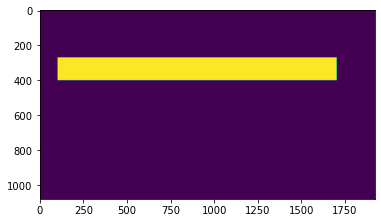

In [153]:
# マスク用単一色画像を作成
height = 100 # 生成画像の高さ
width = 100 # 生成画像の幅
imgMask = np.full((height, width, 1), 1, dtype=np.uint8)

xhosei=0
yhosei=9
img_resize = cv2.resize(imgMask, dsize=[1920,1080], fx=None, fy=None)
# マスク範囲を四角形で描画
boxFromX = 100 #マスク範囲開始位置 X座標
boxFromY = 270 #マスク範囲開始位置 Y座標
boxToX = 1700 #マスク範囲終了位置 X座標
boxToY = 400 #マスク範囲終了位置 Y座標
cv2.rectangle(img_resize, (boxFromX, boxFromY), (boxToX, boxToY),(255), cv2.FILLED)



# マスク結果画像を保存
cv2.imwrite("./mask/testMaskImg.jpg", img_resize)
plt.imshow(img_resize)

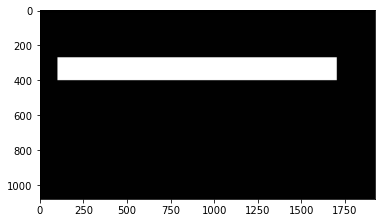

In [154]:
white=cv2.imread("./mask/white.jpg",cv2.IMREAD_COLOR)
im_mask = cv2.imread('./mask/testMaskImg.jpg')
white_resize = cv2.resize(white, dsize=[1920,1080], fx=None, fy=None)
cv2.imwrite("./after/white_resize.jpg",white_resize)
im_out = cv2.bitwise_and(white_resize, im_mask)
cv2.imwrite('./mask/whitemask.jpg', im_out)
plt.imshow(im_out)

True

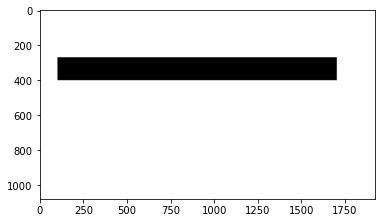

In [155]:
black=cv2.bitwise_not(im_out)
plt.imshow(black)
cv2.imwrite("./mask/blackmask.jpg",black)

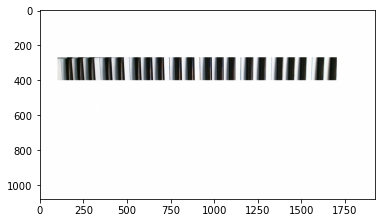

In [156]:
im_1 = cv2.imread('./imagefile/tryout/img_000.jpg', cv2.IMREAD_COLOR)
im_mask = cv2.imread('./mask/blackmask.jpg')

im_out = cv2.bitwise_or(im_1, im_mask)
cv2.imwrite('./after/out.jpg', im_out)
plt.imshow(im_out)

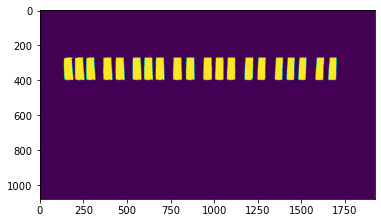

In [157]:
# 画像をグレースケールで読み出しオブジェクトimg_grayに代入
img_gray = cv2.cvtColor(im_out,cv2.COLOR_BGR2GRAY)
# img_grayを平均化領域9x9で平均化処理しimg_blurに代入
img_blur = cv2.blur(img_gray,(9,9)) 

#閾値
threshold=120

# オブジェクトimg_blurを閾値thresholdで反転二値化しimg_binaryに代入
ret, img_binary= cv2.threshold(img_blur, threshold, 255, cv2.THRESH_BINARY_INV)
cv2.imwrite("./after/image0.jpg",img_binary) 
# img_binaryを輪郭抽出
contours, hierarchy = cv2.findContours(img_binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
plt.imshow(img_binary)

0 外接矩形の座標
[[1650  398]
 [1658  268]
 [1703  271]
 [1695  401]] 

1 外接矩形の座標
[[1577  398]
 [1583  269]
 [1627  271]
 [1622  400]] 

2 外接矩形の座標
[[1479  398]
 [1485  269]
 [1527  271]
 [1521  400]] 

3 外接矩形の座標
[[1412  398]
 [1417  269]
 [1460  271]
 [1455  400]] 

4 外接矩形の座標
[[1345  398]
 [1350  269]
 [1393  271]
 [1387  400]] 

5 外接矩形の座標
[[1245  398]
 [1249  269]
 [1293  271]
 [1289  400]] 

6 外接矩形の座標
[[1171  398]
 [1174  270]
 [1221  271]
 [1218  399]] 

7 外接矩形の座標
[[1071  271]
 [1118  271]
 [1118  399]
 [1071  399]] 

8 外接矩形の座標
[[1004  398]
 [1004  270]
 [1051  270]
 [1051  398]] 

9 外接矩形の座標
[[935 271]
 [984 271]
 [984 399]
 [935 399]] 

10 外接矩形の座標
[[837 271]
 [885 271]
 [885 399]
 [837 399]] 

11 外接矩形の座標
[[763 271]
 [812 271]
 [812 399]
 [763 399]] 

12 外接矩形の座標
[[662 398]
 [662 270]
 [712 270]
 [712 398]] 

13 外接矩形の座標
[[597 271]
 [647 271]
 [647 399]
 [597 399]] 

14 外接矩形の座標
[[531 271]
 [581 271]
 [581 399]
 [531 399]] 

15 外接矩形の座標
[[428 271]
 [479 269]
 [485 398]
 [434 401]] 

16 外接矩形の座標

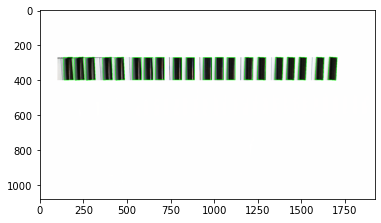

In [158]:
# 小さい輪郭は誤検出として削除する
contours = list(filter(lambda x: cv2.contourArea(x) > 1000, contours))


xleft=[]
xright=[]

ID=0
for i in contours:
    x=[]
    rect = cv2.minAreaRect(i)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    img = cv2.drawContours(im_out,[box],0,(0,255,0),2)
    cv2.imwrite("./after/gaisetu"+str(ID)+".jpg",img)  
    plt.imshow(img)

    # 外接矩形の座標、回転角の表示
    print(str(ID),'外接矩形の座標')
    print(box,"\n")
    #print('回転角:')
    #print(rect[2])
   

    #各輪郭の左端、右端を取得
    for  r in box:
        x+=[r[0]]
    xleft +=[min(x)]
    xright+=[max(x)]

    ID+=1

In [159]:
print(xleft)

[1650, 1577, 1479, 1412, 1345, 1245, 1171, 1071, 1004, 935, 837, 763, 662, 597, 531, 428, 358, 260, 196, 134]


In [160]:
print(xright)

[1703, 1627, 1527, 1460, 1393, 1293, 1221, 1118, 1051, 984, 885, 812, 712, 647, 581, 485, 415, 317, 254, 191]


In [161]:
def bubble_sort(arr):
    change = True
    while change:
        change = False
        for i in range(len(arr) - 1):
            if arr[i] > arr[i + 1]:
                arr[i], arr[i + 1] = arr[i + 1], arr[i]
                change = True
    return arr

In [162]:
xleft=bubble_sort(xleft)
xright=bubble_sort(xright)
print(xleft)
print(xright)

kokken=[[xleft[0],xright[0]]]
i=1
while i<len(xleft):
    kokken+=[[xleft[i],xright[i]]]
    i+=1


[134, 196, 260, 358, 428, 531, 597, 662, 763, 837, 935, 1004, 1071, 1171, 1245, 1345, 1412, 1479, 1577, 1650]
[191, 254, 317, 415, 485, 581, 647, 712, 812, 885, 984, 1051, 1118, 1221, 1293, 1393, 1460, 1527, 1627, 1703]


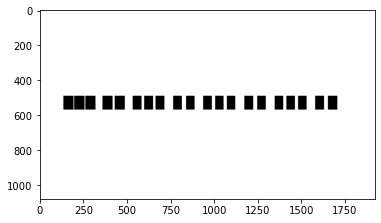

In [163]:
i=0
base=white_resize

while i<len(xleft):
    cv2.rectangle(base,
              (xleft[i], 568),
              (xright[i], 490),
              (0, 0, 0),
              thickness=-1,
              lineType=cv2.LINE_4,
              shift=0)

    i+=1
plt.imshow(base)

In [164]:
#端っこを追加
xright=[0]+xright
xleft =xleft+[1920]

In [165]:
#白い部分の座標
hakkenkari=[[xright[0],xleft[0]]]
i=1
while i<len(xleft):
    hakkenkari+=[[xright[i],xleft[i]]]
    i+=1
print(hakkenkari)

[[0, 134], [191, 196], [254, 260], [317, 358], [415, 428], [485, 531], [581, 597], [647, 662], [712, 763], [812, 837], [885, 935], [984, 1004], [1051, 1071], [1118, 1171], [1221, 1245], [1293, 1345], [1393, 1412], [1460, 1479], [1527, 1577], [1627, 1650], [1703, 1920]]


In [193]:
mean=30
print(mean)


30


In [194]:



#白鍵の正確な座標
i=0
j=0
hakken=[]
while i<len(hakkenkari):
    haklen=hakkenkari[i][1]-hakkenkari[i][0]
    if  haklen>mean and i != 0 and i != len(hakkenkari)-1:#別のところの値使いたい
        hakken+=[[hakkenkari[i][0],math.floor(hakkenkari[i][0]+haklen/2)]]+[[math.ceil(hakkenkari[i][0]+haklen/2),hakkenkari[i][1]]]
        
    else:
        hakken+=[[hakkenkari[i][0],hakkenkari[i][1]]]
    i+=1
print(hakken)

[[0, 134], [191, 196], [254, 260], [317, 337], [338, 358], [415, 428], [485, 508], [508, 531], [581, 597], [647, 662], [712, 737], [738, 763], [812, 837], [885, 910], [910, 935], [984, 1004], [1051, 1071], [1118, 1144], [1145, 1171], [1221, 1245], [1293, 1319], [1319, 1345], [1393, 1412], [1460, 1479], [1527, 1552], [1552, 1577], [1627, 1650], [1703, 1920]]


In [195]:
print(hakken)

[[0, 134], [191, 196], [254, 260], [317, 337], [338, 358], [415, 428], [485, 508], [508, 531], [581, 597], [647, 662], [712, 737], [738, 763], [812, 837], [885, 910], [910, 935], [984, 1004], [1051, 1071], [1118, 1144], [1145, 1171], [1221, 1245], [1293, 1319], [1319, 1345], [1393, 1412], [1460, 1479], [1527, 1552], [1552, 1577], [1627, 1650], [1703, 1920]]


In [196]:
print(kokken)

[[134, 191], [196, 254], [260, 317], [358, 415], [428, 485], [531, 581], [597, 647], [662, 712], [763, 812], [837, 885], [935, 984], [1004, 1051], [1071, 1118], [1171, 1221], [1245, 1293], [1345, 1393], [1412, 1460], [1479, 1527], [1577, 1627], [1650, 1703]]


[[0, 134], [191, 196], [254, 260], [317, 337], [338, 358], [415, 428], [485, 508], [508, 531], [581, 597], [647, 662], [712, 737], [738, 763], [812, 837], [885, 910], [910, 935], [984, 1004], [1051, 1071], [1118, 1144], [1145, 1171], [1221, 1245], [1293, 1319], [1319, 1345], [1393, 1412], [1460, 1479], [1527, 1552], [1552, 1577], [1627, 1650], [1703, 1920]]


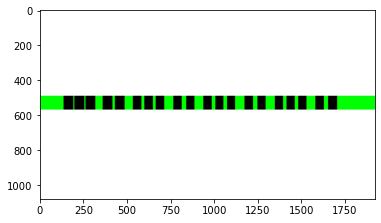

In [197]:

i=0
base=white_resize
while i<len(hakken):
    l=hakken[i][0]
    r=hakken[i][1]
    
    cv2.rectangle(base,
              (l,568),
              (r, 490),
              (0,255,0),
              thickness=-1,
              lineType=cv2.LINE_4,
              shift=0)
    i+=1
cv2.imwrite("./after/hakken.jpg",base)
plt.imshow(base)
print(hakken)


In [198]:
#音の高さを検出
n=0 #右から何番目かを入力　左端は0 このプログラムだと0がシ
i=n

nanabit=[]
while i<7+n:
    print(hakken[i+1][0],hakken[i][1])
    if hakken[i+1][0]-hakken[i][1]>1:
        nanabit+=[0]
    else :
        nanabit+=[1]+[1]
        i+=1
    i+=1
if len(nanabit)>7:
    nanabit.pop(-1)
    nanabit[6]=0
print(nanabit)
i=6
tensin=0
k=1
while i>=0:
    tensin+=nanabit[i]*k
    k*=2
    i-=1

print(tensin)

191 134
254 196
317 260
338 337
485 428
508 508
[0, 0, 0, 1, 1, 0, 0]
12


In [199]:
if tensin==24:hstart=0
if tensin==51:hstart=1
if tensin==102:hstart=2
if tensin==12:hstart=3
if tensin==27:hstart=4
if tensin==54:hstart=5
if tensin==108:hstart=6
print(hstart)


3


In [200]:
#オクターブ
n=2

In [201]:
i=0
doremi=["C","D","E","F","G","A","B"]
hakkendoremi=[]
while i<len(hakken):
    hakkendoremi+=[str(doremi[(hstart+i)%7])+str(math.floor((hstart+i)/7)+n)]
    i+=1
print(hakkendoremi)

['F2', 'G2', 'A2', 'B2', 'C3', 'D3', 'E3', 'F3', 'G3', 'A3', 'B3', 'C4', 'D4', 'E4', 'F4', 'G4', 'A4', 'B4', 'C5', 'D5', 'E5', 'F5', 'G5', 'A5', 'B5', 'C6', 'D6', 'E6']


True

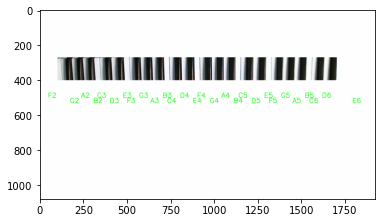

In [202]:
#base2 = cv2.imread("./after/white_resize.jpg")
#base2=im_out
base3=cv2.imread("./after/out.jpg")
plt.imshow(base3)
i=0
while i<len(hakken):
    t=i%2*30
    cv2.putText(base3,
            text=(str(doremi[(hstart+i)%7])+str(math.floor((hstart+i)/7)+n)),
            org=(math.floor((hakken[i][1]+hakken[i][0])/2)-22,500+t),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=1.3,
            color=(0, 255, 0),
            thickness=2,
            lineType=cv2.LINE_4)
    i+=1

plt.imshow(base3)
cv2.imwrite("./after/doremi.jpg",base3)

In [203]:
if hstart==0 or hstart==6:bstart=0
if hstart==1 :bstart=1
if hstart==2 or hstart==3:bstart=2
if hstart==4 : bstart=3
if hstart==5 : bstart=4
print(hstart,bstart)

3 2


In [204]:
sharp=["C#","D#","F#","G#","A#"]
if hstart==6:
    n+=1
i=0
kokkendoremi=[]
while i<len(kokken):
    kokkendoremi+=[str(sharp[(bstart+i)%5])+str(math.floor((bstart+i)/5)+n)]
    i+=1
print(kokkendoremi)

['F#2', 'G#2', 'A#2', 'C#3', 'D#3', 'F#3', 'G#3', 'A#3', 'C#4', 'D#4', 'F#4', 'G#4', 'A#4', 'C#5', 'D#5', 'F#5', 'G#5', 'A#5', 'C#6', 'D#6']


True

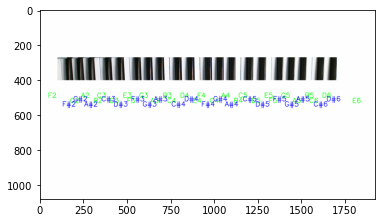

In [205]:
i=0
while i<len(kokken):
    t=i%2*30
    cv2.putText(base3,
            text=(str(sharp[(bstart+i)%5])+str(math.floor((bstart+i)/5)+n)),
            org=(math.floor((kokken[i][1]+kokken[i][0])/2)-35,550-t),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=1.3,
            color=(0, 0, 255),
            thickness=2,
            lineType=cv2.LINE_4)
    i+=1

plt.imshow(base3)
cv2.imwrite("./after/doremi.jpg",base3)

0 外接矩形の座標
[[1038  840]
 [1106  721]
 [1136  739]
 [1067  857]] 

1 外接矩形の座標
[[   0  641]
 [1103  641]
 [1103 1078]
 [   0 1078]] 

2 外接矩形の座標
[[148 793]
 [219 762]
 [237 805]
 [166 836]] 

3 外接矩形の座標
[[1131  626]
 [1919  626]
 [1919 1079]
 [1131 1079]] 

4 外接矩形の座標
[[   0    0]
 [1919    0]
 [1919  595]
 [   0  595]] 



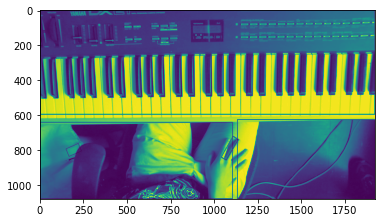

In [209]:
#im_mask = cv2.cvtColor(im_mask, cv2.COLOR_BGR2GRAY)
img_1 = cv2.imread('./imagefile/tryout/img_000.jpg',1)
img_1_gray = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
im_out = cv2.cvtColor(img_1,cv2.COLOR_BGR2GRAY)
img_1_gray = cv2.bitwise_or(img_1_gray, im_out)


# img_grayを平均化領域9x9で平均化処理しimg_blurに代入
img_blur = cv2.blur(img_1_gray,(9,9)) 
threshold=130

img_blur = img_1_gray
cv2.imwrite("./after/image1.jpg",img_blur)



# オブジェクトimg_blurを閾値thresholdで反転二値化しimg_binaryに代入
ret, img_binary= cv2.threshold(img_blur, threshold, 255, cv2.THRESH_BINARY_INV) 

# img_grayを平均化領域9x9で平均化処理しimg_blurに代入

cv2.imwrite("./after/image2.jpg",img_binary)

# img_binaryを輪郭抽出
contours, hierarchy = cv2.findContours(img_binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

# 小さい輪郭は誤検出として削除する
contours = list(filter(lambda x: cv2.contourArea(x) > 2000, contours))


xleft2=[]


ID=0
for i in contours:
    x=[]
    rect = cv2.minAreaRect(i)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    img = cv2.drawContours(im_out,[box],0,(0,255,0),2)
    cv2.imwrite("./after/kagegai"+str(ID)+".jpg",img)  
    plt.imshow(img)

    # 外接矩形の座標、回転角の表示
    print(str(ID),'外接矩形の座標')
    print(box,"\n")
    
   

    #各輪郭の左端、右端を取得
    for  r in box:
        x+=[r[0]]
    xleft2 +=[min(x)]
    
    ID+=1


In [210]:
#黒鍵検出のとき基準とする影の左端
print(xleft2)




[1038, 0, 148, 1131, 0]


In [211]:
#比較やるよー

In [212]:
img_1 = cv2.imread('./imagefile/tryout/img_000.jpg',1)
img_1_gray = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
print(img_1_gray.shape)
img_1 = cv2.bitwise_or(img_1_gray, im_mask)

(1080, 1920)


In [213]:
#01に変換
bothdoremi=hakkendoremi+kokkendoremi
#print(bothdoremi)
num=1
nijigen=[]
sasaki=[]


In [214]:
while(1):
    # ここから画像の比較
    img_number = num
    if img_number < 100:
        if img_number < 10:
            img_number = "0"+str(img_number)
        img_number = "0"+str(img_number)
    print(num)

# 比較したい画像を入力
    img_2_PATH = './imagefile/tryout/img_'+str(img_number)+'.jpg'
    img_2 = cv2.imread(img_2_PATH, 1)

    if img_2 is None:
        break

    img_2_gray = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)
    # print(img_2_gray.shape)
    img_2 = cv2.bitwise_or(img_2_gray, im_mask)


# 画像を引き算
    img_diff = cv2.absdiff(img_1, img_2)

# 2値化
    ret2, img_th = cv2.threshold(img_diff, 13, 255, cv2.THRESH_BINARY)
    #閾値もともと20


    # アパーチャーサイズ 3, 5, or 7 など 1 より大きい奇数。数値が大きいほどぼかしが出る。
    ksize = 3
    # 中央値フィルタ
    img_mask = cv2.medianBlur(img_th, ksize)
    # 近傍の定義
    neiborhood = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]],
                          np.uint8)

    # 収縮
    #img_mask = cv2.erode(img_th,neiborhood,iterations=6)
    # 膨張
    #img_mask = cv2.dilate(img_mask,neiborhood,iterations=6)

    # plt.imshow(img_mask)
    if num==35:
        cv2.imwrite("./after/sa.jpg", img_mask)


# 輪郭を検出
    contours, hierarchy = cv2.findContours(
        img_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    contours = list(filter(lambda x: cv2.contourArea(x) > 400, contours))
    if len(contours)==0:
        print("None")
    testarray = []
    output = []
    keyinfo = []

    # output=[]

      # 閾値以上の差分を四角で囲う
    for i, cnt in enumerate(contours):
        if width > 50 or height > 50:
            x, y, width, height = cv2.boundingRect(cnt)
            print(num,width,height)
            """cv2.rectangle(img_1, (x, y), (x+width, y+height),
                              (0, 0, 255), 1)"""
            # 黒鍵検出　元の影よりも重心のx座標が大きいか小さいか
            jyusin = math.floor(x + width / 2)
            # print(jyusin)
            i = 1
            numi = xleft2[i]
            numi1 = xleft2[i-1]

            while (numi-jyusin)*(numi-jyusin) < (numi1-jyusin)*(numi1-jyusin):
                    i = i+1
                    numi = xleft2[i]
                    numi1 = xleft2[i-1]
            if numi1 < jyusin:
                    # print("kokken")
                    kenshoku = 0

            else:
                    if numi1 >= jyusin:
                        # print("hakken")
                        kenshoku = 1

                    # else :
                        # print("nothing")
            testarray += [[jyusin, kenshoku]]
                # print("")

        # plt.imshow(img_1)
        # print(testarray)
    cx = []
    # cy=[]
    i = 0
    while i < len(testarray):
            #M = cv2.moments(cnt)
            #cx = int(M['m10']/M['m00'])
            #cy = int(M['m01']/M['m00'])
            cx += [testarray[i][0]]
            # cy += [500]#(仮)
            i += 1
    j = 0
    while j < len(cx):
            i = 0
            while hakken[i+1][0] < cx[j]:
                # print(hakkendoremi[i])
                i += 1
            score = str(doremi[(hstart+i) %7]+str(math.floor(i/7)+n))
            # print(score)
            # 白鍵と黒鍵の変更
            if testarray[j][1] == 1  or (doremi[(hstart+i)%7] == "E") or (doremi[(hstart+i)%7]=="B"):
                # print(score)
                keyinfo += [score]
            else:
                if testarray[j][1] == 0:
                    # print(score[:1] + '#' + score[1:])

                    # 黒鍵切り替え
                    # keyinfo+=[score[:1] + '#' + score[1:]]
                    keyinfo += [score]

            j += 1
        # print(keyinfo)

    i = 0
    while i < len(bothdoremi):
            if bothdoremi[i] in keyinfo:
                output += [1]
            else:
                output += [0]
            # print(bothdoremi[i],output[i])
            i += 1

        # print(output)
    nijigen += [output]
    sasaki += [keyinfo]
    num += 1


1
None
2
None
3
None
4
None
5
None
6
None
7
None
8
None
9
None
10
None
11
None
12
None
13
None
14
None
15
None
16
None
17
None
18
None
19
None
20
None
21
None
22
None
23
None
24
None
25
None
26
None
27
None
28
None
29
None
30
None
31
None
32
None
33
None
34
None
35
None
36
None
37
None
38
None
39
None
40
None
41
None
42
None
43
None
44
None
45
None
46
None
47
None
48
None
49
None
50
None
51
None
52
None
53
None
54
None
55
None
56
None
57
None
58
None
59
None
60
None
61
None
62
None
63
None
64
None
65
None
66
None
67
None
68
None
69
None
70
None
71
None
72
None
73
None
74
None
75
None
76
None
77
None
78
None
79
None
80
None
81
None
82
None
83
None
84
None
85
None
86
None
87
None
88
None
89
None
90
None
91
None
92
None
93
None
94
None
95
None
96
None
97
None
98
None
99
None
100
None
101
None
102
None
103
None
104
None
105
None
106
None
107
None
108
None
109
None
110
None
111
None
112
None
113
None
114
None
115
None
116
None
117
None
118
None
119
None
120
None
121
None
122
None
123
None
1

In [215]:
print(bothdoremi)

['F2', 'G2', 'A2', 'B2', 'C3', 'D3', 'E3', 'F3', 'G3', 'A3', 'B3', 'C4', 'D4', 'E4', 'F4', 'G4', 'A4', 'B4', 'C5', 'D5', 'E5', 'F5', 'G5', 'A5', 'B5', 'C6', 'D6', 'E6', 'F#2', 'G#2', 'A#2', 'C#3', 'D#3', 'F#3', 'G#3', 'A#3', 'C#4', 'D#4', 'F#4', 'G#4', 'A#4', 'C#5', 'D#5', 'F#5', 'G#5', 'A#5', 'C#6', 'D#6']


In [216]:
i=0
while i<len(nijigen):
    print(nijigen[i])
    i+=1

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [217]:
print(len(nijigen[0]))
print(len(hakkendoremi))
print(len(kokkendoremi))

48
28
20


In [218]:
i=0
while i<len(sasaki):
    print(sasaki[i])
    i+=1

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['C3']
['C3']
['C3']
['C3']
['C3']
['C3']
['C3']
['C3']
['C3']
['C3']
['C3']
['C3']
['C3']
['C3']
['C3']
['C3']
['C3']
['C3']
[]
['C3']
['C3']
['C3']
['C3']
['C3']
['C3']
['C3']
['C3']
['C3']
['C3']
['C3']
['C3']
['C3']
['C3']
['C3']
['C3']
['C3']
['C3']
['C3']
['G4', 'C3']
['G4', 'C3']
['G4']
['G4']
['G4']
['G4']
['G4']
['G4']
['G4']
['G4']
['G4']
['G4']
['G4']
['G4']
['G4']
['G4']
['G4']
['G4']
[]
[]
[]
['G4']
['G4']
['G4']
['G4']
['G4']
['G4']
['G4']
['G4']
['G4']
['G4']
['G4']
['G4']
['G4']
['G4']
['G4']
['G4']
['G4']
['A4', 'G4']
['A4', 'G

In [219]:
print(sasaki)

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['C3'], ['C3'], ['C3'], ['C3'], ['C3'], ['C3'], ['C3'], ['C3'], ['C3'], ['C3'], ['C3'], ['C3'], ['C3'], ['C3'], ['C3'], ['C3'], ['C3'], ['C3'], [], ['C3'], ['C3'], ['C3'], ['C3'], ['C3'], ['C3'], ['C3'], ['C3'], ['C3'], ['C3'], ['C3'], ['C3'], ['C3'], ['C3'], ['C3'], ['C3'], ['C3'], ['C3'], ['C3'], ['G4', 'C3'], ['G4', 'C3'], ['G4'], ['G4'], ['G4'], ['G4'], ['G4'], ['G4'], ['G4'], ['G4'], ['G4'],